# E-Commerce Customer Analysis 

In [3]:
import pandas as pd #Data Manipulation
import matplotlib.pyplot as plt #Plot Making 
import seaborn as sns

orders = pd.read_csv("online_retail.csv")

# Data Cleaning

1. All rows in the 'StockCode' column that contains the letter 'C' are considered as cancelled orders, therefore do not contribute to the overall income. Said rows are removed from the dataset.
2. There are rows in the 'Quantity' column that contained a 0 (zero) value, therefore do not contribute to the overall income. Said rows were removed from the dataset.
3. There are rows in the 'UnitPrice' column that contained a 0 (zero) value, therefore do not contribute to the overall income. Said rows were removed from the dataset.

In [4]:
orders = orders[orders["StockCode"].str.contains("C") == False]
orders = orders[orders['Quantity'] > 0]
orders = orders[orders['UnitPrice'] > 0]

orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


# Income Row

To identify the generated income for each order placed, UnitPrice and Quantity columns were multiplied. All the values were stored into a new 'Income' column that was added into the dataset.

In [ ]:
orders['Income'] = orders['UnitPrice'] * orders['Quantity']
orders['Income']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Income, Length: 523635, dtype: float64

# Top 5 Countries Based on Overall Income

All the rows were grouped based on each country using a groupby function. Their income values were then sorted in descending order. Through a bar plot, the first 5 countries in the sorted list where shown. 

The top 5 countries are the following: United Kingdom, Netherlands, Eire (Ireland), Germany, and France. United Kingdom contributed to more than 8 million pounds, while the rest contributed to less than 1 million pounds.

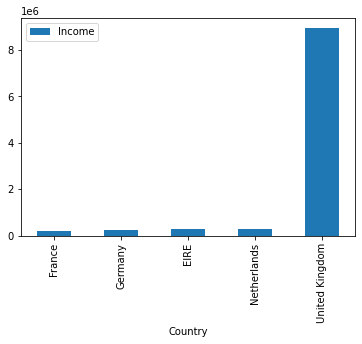

In [6]:
by_country = orders.groupby('Country').sum().sort_values('Income')
ax = by_country[-5:].plot.bar(y = 'Income')

# Profit on Different Days of the Week

In order to see what days in the week are customers most likely to buy in the e-commerce platform, a linegraph was made to compare the income between different days. The InvoiceDate column was first parsed. Every order was labeled on what day was the order placed by adding a new column named 'day' that holds a day name value for each row. The dataset was grouped using a groupby fuction based on the day column. The average for all the values were then calculated.

Thursday and Tuesday has the highest amount of sales, while Sunday has the lowest. It is preferable for the team to advertise during Thursday and Tuesday.

Text(0.5, 1.0, 'Monthly Income')

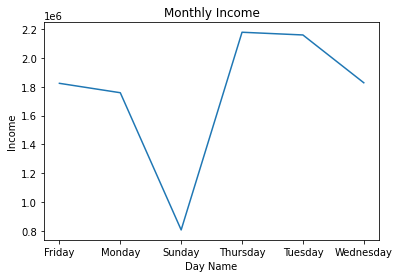

In [7]:
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'], errors='coerce')

orders['day'] = orders['InvoiceDate'].dt.day_name()

by_day = orders.groupby('day').sum()
ax = sns.lineplot(x=by_day.index, y='Income', data = by_day)
ax.set_xlabel('Day Name')
ax.set_ylabel('Income')
ax.set_title('Monthly Income')

# Profits on the Months of the Year

In order to see what months of the year are customers most likely to buy in the e-commerce platform, a linegraph was made to compare the income between different time periods. Every order was labeled on what month was the order placed by adding a new column named 'month' that holds a month value for each row. The dataset was grouped using a groupby fuction based on the month column. The sum for all the values were then calculated.

As soon as the 'Ber Months' arrive (September onwards), the overall income has significantly increased. The value reaches a peak right before December. The months with the lowest incomes are in the first 4 months of the year.

Text(0.5, 1.0, 'Monthly Income')

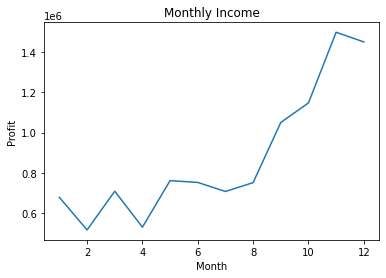

In [8]:
orders['month'] = orders['InvoiceDate'].dt.month
by_month = orders.groupby('month').sum()
ax = sns.lineplot( x=by_month.index, y='Income', data=by_month )
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Monthly Income')

# Profits on the Months of the Year

In order to see what time of the day are customers most likely to buy, a linegraph was made to compare the income between different time periods. Every order was labeled on what hour was the order placed by adding a new column named 'hour' that holds an hour value for each row. The dataset was grouped using a groupby fuction based on the hour column. The sum for all the values were then calculated.

From 10 AM to 4 PM, income was consistently high which means customers shop within those times. The time before 10 AM and after 4 PM, sales are consistently low.

Text(0.5, 1.0, 'Income on Each Hour')

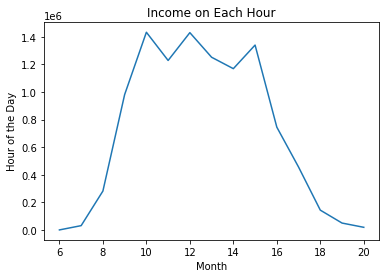

In [9]:
orders['hour'] = orders['InvoiceDate'].dt.hour
by_hour = orders.groupby('hour').sum()

ax = sns.lineplot(x=by_hour.index, y='Income', data = by_hour)

ax.set_xlabel('Month')
ax.set_ylabel('Hour of the Day')
ax.set_title('Income on Each Hour')